In [1]:
import torch
from dataset import MultimodalDataset, get_transforms

/home/shved/PythonProjects/final_sprint4/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Config:
    # для воспроизводимости
    SEED = 42

    # Модели
    TEXT_MODEL_NAME = "albert-base-v1" # "bert-base-uncased"
    IMAGE_MODEL_NAME = "tf_efficientnet_b0"

    # Какие слои размораживаем - совпадают с нэймингом в моделях
    TEXT_MODEL_UNFREEZE = "" # encoder.layer.11|pooler
    IMAGE_MODEL_UNFREEZE = "blocks.6|conv_head|bn2" #

    # Гиперпараметры
    BATCH_SIZE = 128
    TEXT_LR = 3e-5
    IMAGE_LR = 1e-4
    REGRESSOR_LR = 5e-3
    EPOCHS = 50
    DROPOUT = 0.05
    HIDDEN_DIM = 256
    NUM_CLASSES = 555
    TARGET_MAE = 50

    # Пути
    DF_PATH = "data/dish.csv"
    INGR_DF_PATH = "data/ingredients.csv"
    SAVE_PATH = "best_model.pth"




device = "cuda" if torch.cuda.is_available() else "cpu"
config = Config()

In [3]:
transforms = get_transforms(config=config)
train_dataset = MultimodalDataset(config, transforms)
print('len(train_dataset)=', len(train_dataset))
print(train_dataset.df.head())
train_dataset[1]

len(train_dataset)= 2755
   index          dish_id  total_calories  total_mass  \
0      1  dish_1561662054      419.438782       292.0   
1      3  dish_1560455030       20.590000       103.0   
2      4  dish_1558372433       74.360001       143.0   
3      5  dish_1565640549       45.482903       139.0   
4      6  dish_1563207364      309.269989       271.0   

                                         ingredients  split  \
0  ingr_0000000312;ingr_0000000026;ingr_000000002...  train   
1    ingr_0000000471;ingr_0000000031;ingr_0000000347  train   
2                                    ingr_0000000453  train   
3  ingr_0000000032;ingr_0000000523;ingr_000000016...  train   
4  ingr_0000000008;ingr_0000000192;ingr_000000044...  train   

                                                text  \
0  pepper,white rice,mixed greens,garlic,soy sauc...   
1             cherry tomatoes,cucumbers,baby carrots   
2                                         deprecated   
3  tomatoes,cilantro,olive oi

{'target': 20.59,
 'image': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
 

In [4]:
train_dataset.df_ingr.head()

,ingr
id,
1,cottage cheese
2,strawberries
3,garden salad
4,bacon
5,potatoes


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


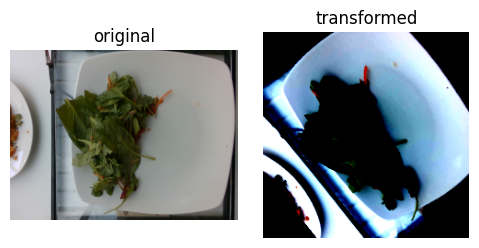

{'target': 67.877647,
 'text': 'tomatoes,vinegar,spinach (raw),mustard,olive oil,cucumbers,mustard greens,garlic,salt',
 'mass': 60.0,
 'text_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [5]:
from dataset import plot_image

row = train_dataset[len(train_dataset) - 1]
plot_image(row.pop('source_image'), row.pop('image'))
row


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


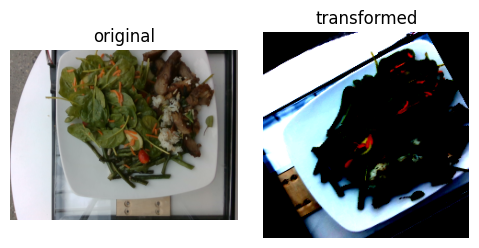

{'target': 419.438782,
 'text': 'pepper,white rice,mixed greens,garlic,soy sauce,millet,lemon juice,bok choy,olive oil,onions,vinegar,green beans,pork,apple,sugar,salt,parsley',
 'mass': 292.0,
 'text_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [6]:
row = train_dataset[0]
plot_image(row.pop('source_image'), row.pop('image'))
row

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].


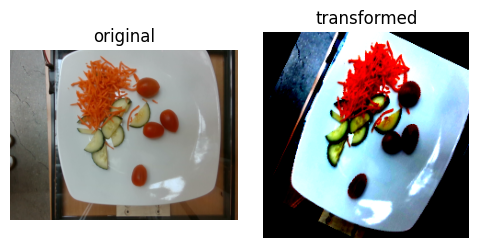

{'target': 20.59,
 'text': 'cherry tomatoes,cucumbers,baby carrots',
 'mass': 103.0,
 'text_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [7]:
row = train_dataset[1]
plot_image(row.pop('source_image'), row.pop('image'))
row

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.7859695].


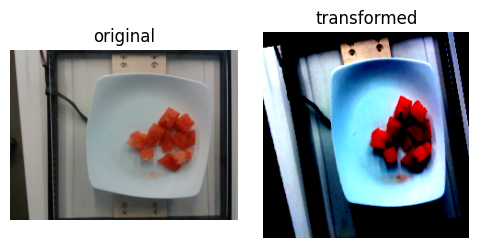

{'target': 20.400002,
 'text': 'deprecated',
 'mass': 68.0,
 'text_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [8]:
row = train_dataset[100]
plot_image(row.pop('source_image'), row.pop('image'))
row


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


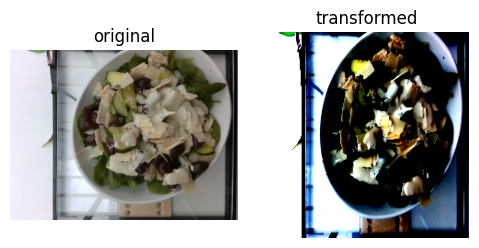

{'target': 560.658997,
 'text': 'cucumbers,spinach (raw),parmesan cheese,caesar dressing,chicken,olives',
 'mass': 522.0,
 'text_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [9]:
row = train_dataset[250]
plot_image(row.pop('source_image'), row.pop('image'))
row


In [10]:
from utils import train
train(config, device,)

Разморожен слой: blocks.6.0.conv_pw.weight
Разморожен слой: blocks.6.0.bn1.weight
Разморожен слой: blocks.6.0.bn1.bias
Разморожен слой: blocks.6.0.conv_dw.weight
Разморожен слой: blocks.6.0.bn2.weight
Разморожен слой: blocks.6.0.bn2.bias
Разморожен слой: blocks.6.0.se.conv_reduce.weight
Разморожен слой: blocks.6.0.se.conv_reduce.bias
Разморожен слой: blocks.6.0.se.conv_expand.weight
Разморожен слой: blocks.6.0.se.conv_expand.bias
Разморожен слой: blocks.6.0.conv_pwl.weight
Разморожен слой: blocks.6.0.bn3.weight
Разморожен слой: blocks.6.0.bn3.bias
Разморожен слой: conv_head.weight
Разморожен слой: bn2.weight
Разморожен слой: bn2.bias
training started


TypeError: MultimodalModel.forward() missing 1 required positional argument: 'text_id'

In [ ]:
from utils import MultimodalModel
val_model = MultimodalModel(config)
val_model.load_state_dict(torch.load(config.SAVE_PATH, weights_only=True))

In [ ]:

from functools import partial
from torch.utils.data import DataLoader
from transformers import AutoModel, AutoTokenizer
from utils import collate_fn

tokenizer = AutoTokenizer.from_pretrained(config.TEXT_MODEL_NAME)
val_transforms = get_transforms(config, ds_type="val")
val_dataset = MultimodalDataset(config, val_transforms, ds_type="test", n_rows=n_rows)
val_loader = DataLoader(val_dataset,
                        batch_size=config.BATCH_SIZE,
                        shuffle=False,
                        collate_fn=partial(collate_fn,
                                            tokenizer=tokenizer))


In [ ]:
from utils import validate
import torchmetrics

val_mae = validate(val_model, val_loader=val_loader, device=device, metric=torchmetrics.MeanAbsoluteError().to(device))
print("Validate MAE = ", val_mae)